In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
CIP_data = pd.read_csv("CIP_data_encode_prev_not_dropped.csv")


In [1]:
### "abline" R
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')



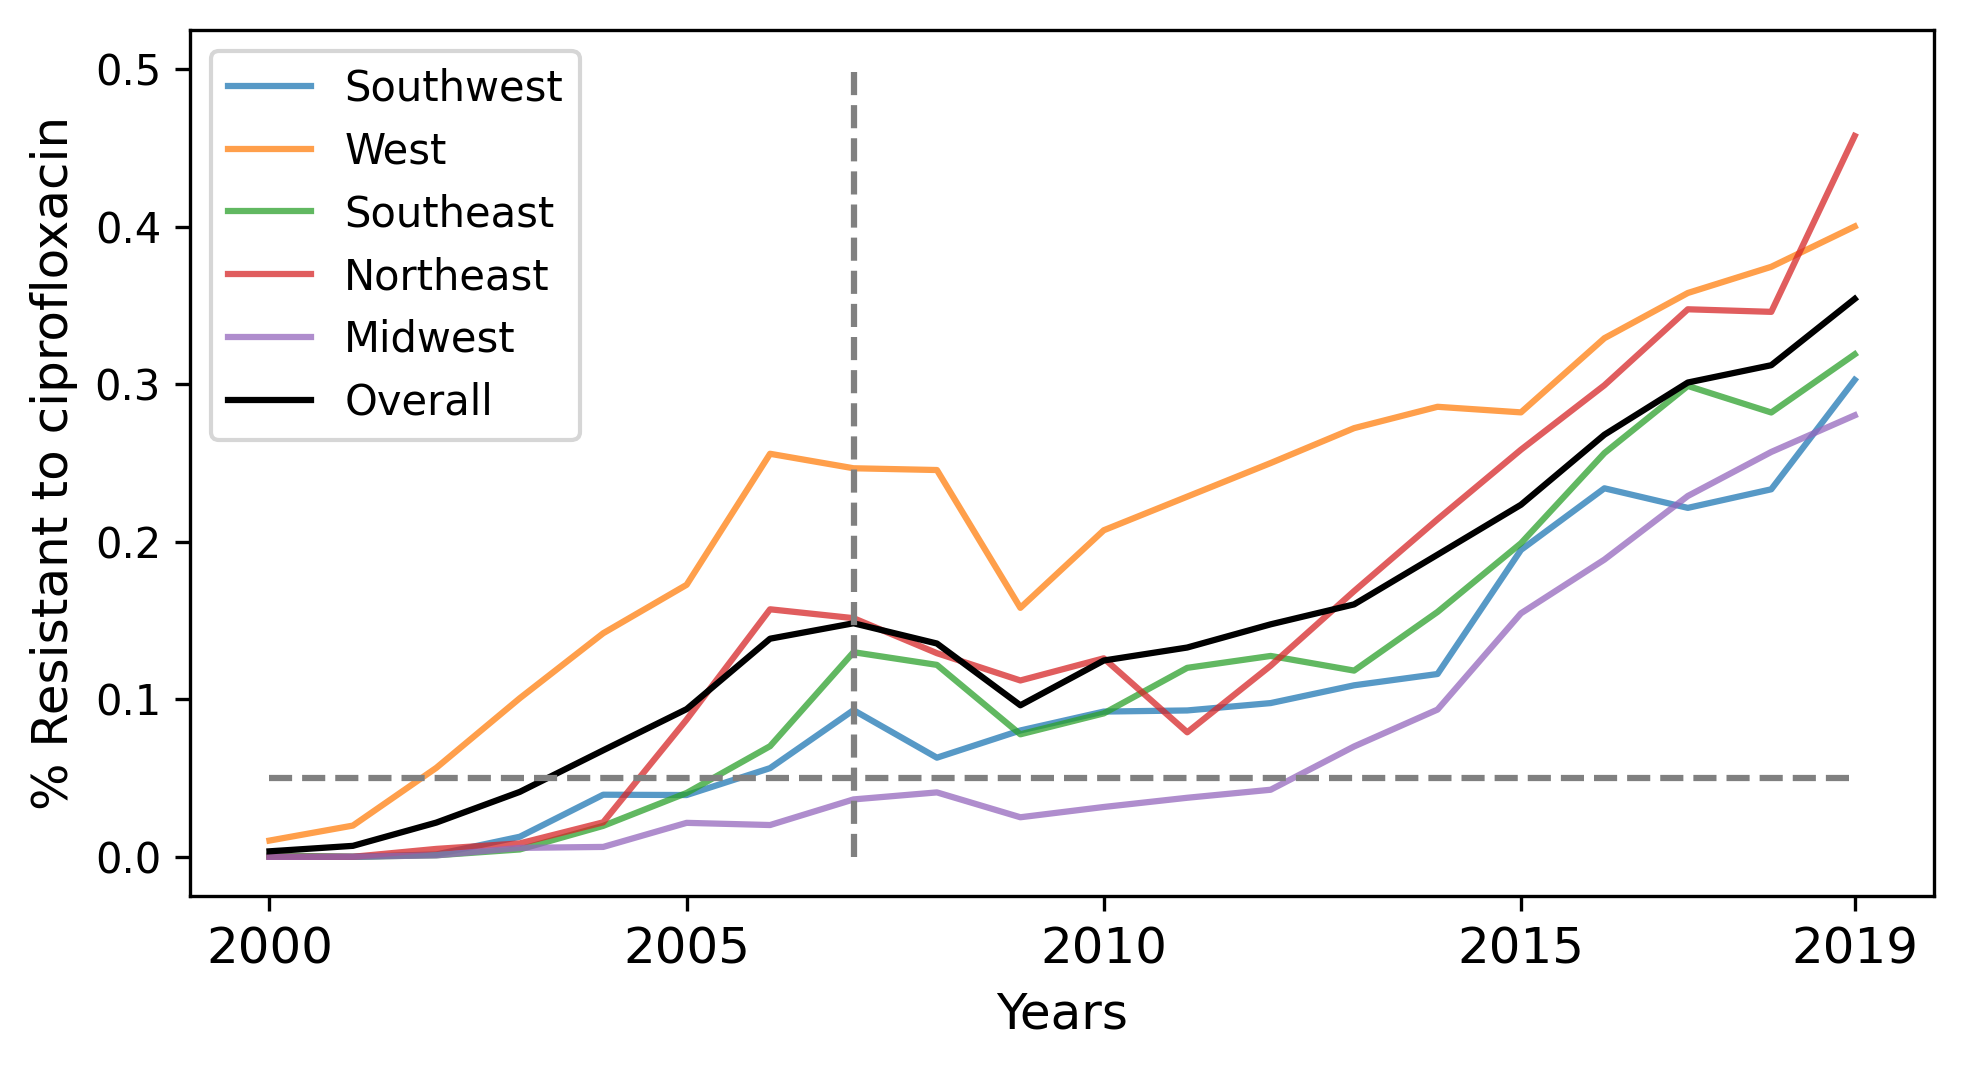

In [17]:
### first instance, plot where there was a change - only looking at CIPRO, which was no longer recommended by the CDC in 2007
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
regions = CIP_data["REGION"].unique()


years = CIP_data["YEAR"].unique()
reistance_by_year_overall = []
reistance_by_year_all = pd.DataFrame() 
for year in years:
    CIP_data_year = CIP_data.loc[CIP_data['YEAR'] == year]
    reistance_by_year_overall.append(1 - CIP_data_year["Susceptible"].sum()/len(CIP_data_year))


plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for region in regions:
    CIP_data_region = CIP_data.loc[CIP_data['REGION'] == region]
    reistance_by_year = []
    for year in years:
        CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
        
    plt.plot(years, reistance_by_year, label=region, alpha=0.75)

plt.plot(years, reistance_by_year_overall, color = "black", label = "Overall")

legend_labels = [regions, 'Overall']


#plt.plot(years, reistance_by_year)
#plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to ciprofloxacin", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()

plt.vlines(x = 2007, ymin = 0, ymax = 0.5, colors = "grey", linestyle='dashed')
plt.hlines(y = 0.05, xmin = 2000, xmax = 2019, colors = "grey", linestyle='dashed')

In [19]:
#Compute Total Use of Drug Per Row
drugs = ["CIP", "TET", "PEN", "AZI", "CFX", "CRO"]
drugs_name = {
    'CIP': 'Ciprofloxacin',
    'TET': 'Tetracycline',
    'PEN': 'Penicillin',
    'AZI': 'Azithromycin',
    'CFX': 'Cefixime',
    'CRO': 'Ceftriaxone'}

drugsDict = {}
for drug in drugs:
    drugsDict[drug] = list(CIP_data.columns)

for variable in range(len(list(CIP_data.columns))):
    if "CipR" not in drugsDict["CIP"][variable]:
        drugsDict["CIP"][variable] = None
    if "TetR" not in drugsDict["TET"][variable]:
        drugsDict["TET"][variable] = None
    if "PenR" not in drugsDict["PEN"][variable]:
        drugsDict["PEN"][variable] = None
    if "AziRS" not in drugsDict["AZI"][variable]:
        drugsDict["AZI"][variable] = None
    if "CfxRS" not in drugsDict["CFX"][variable]:
        drugsDict["CFX"][variable] = None
    if "CroRS" not in drugsDict["CRO"][variable]:
        drugsDict["CRO"][variable] = None
        
print(drugsDict)
    

{'CIP': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'TET': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'PEN': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'AZI': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'CFX': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'CRO': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
